In [1]:
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Working with iris dataset

In [3]:
dataset = load_iris()

In [4]:
df = pd.DataFrame(dataset['data'],columns=['sepal_length', 'sepal_width','petal_length','petal_width'])
df['target'] = dataset['target']
print(df.shape)
df.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


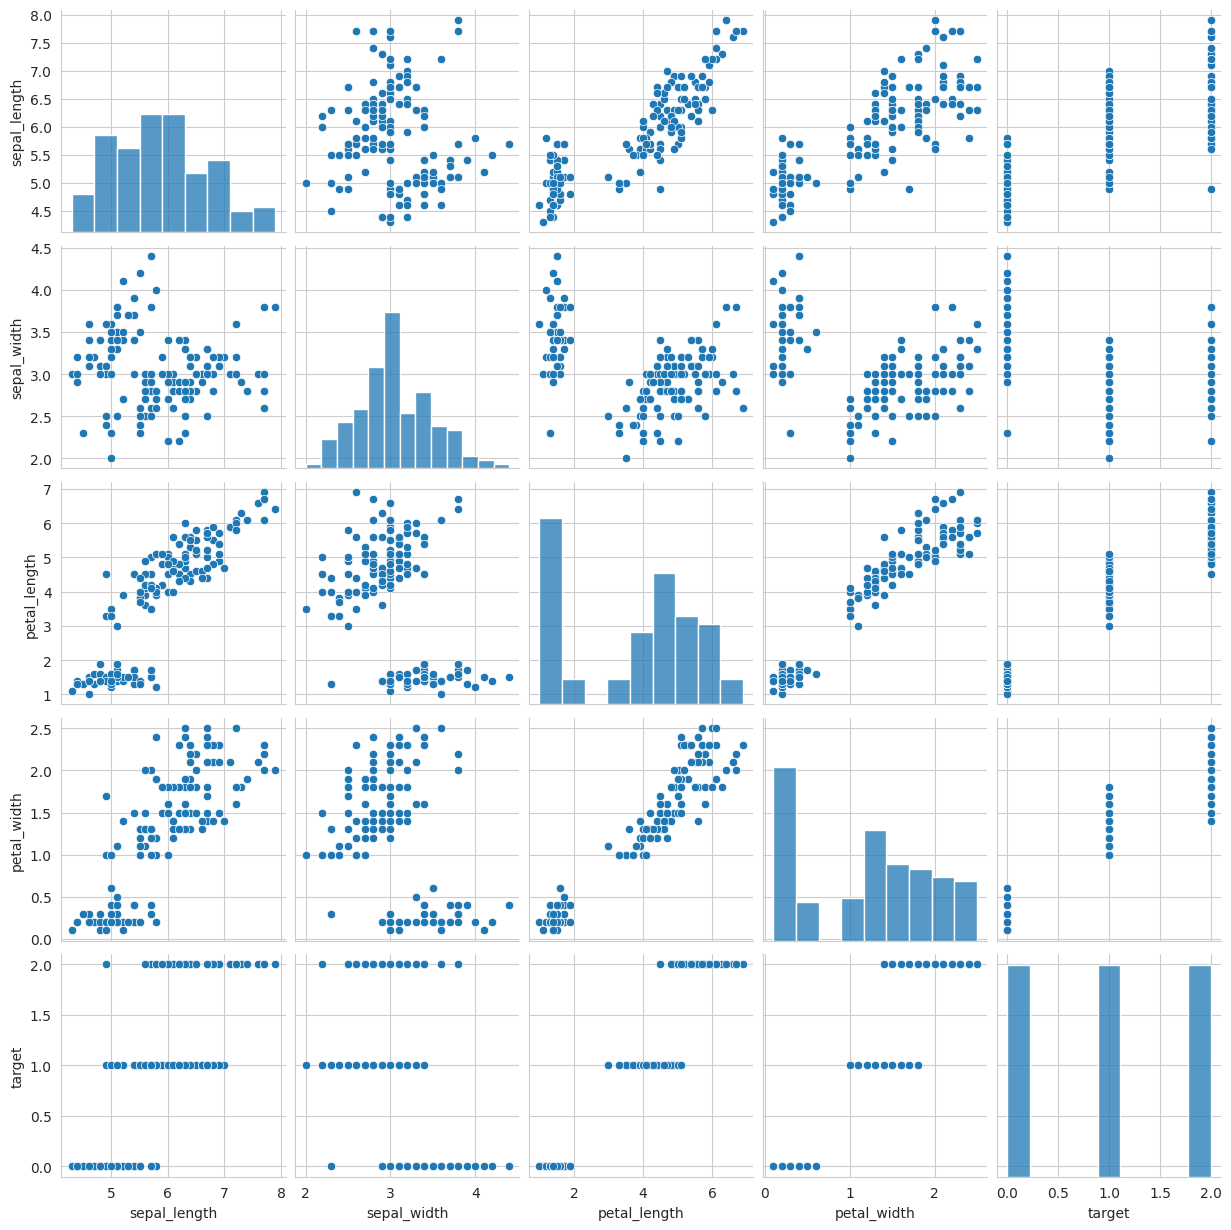

In [5]:
sns.pairplot(data=df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

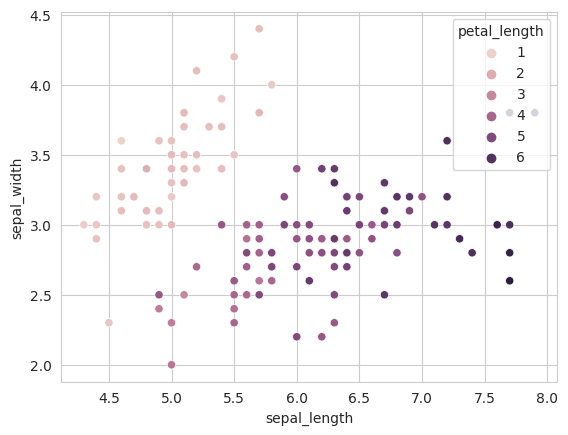

In [6]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='petal_length')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

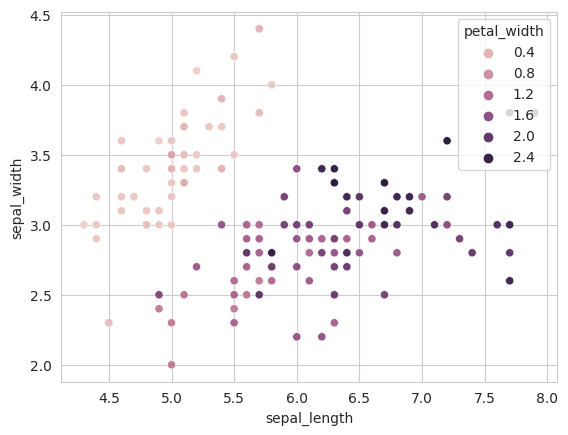

In [7]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='petal_width')

<Axes: xlabel='target'>

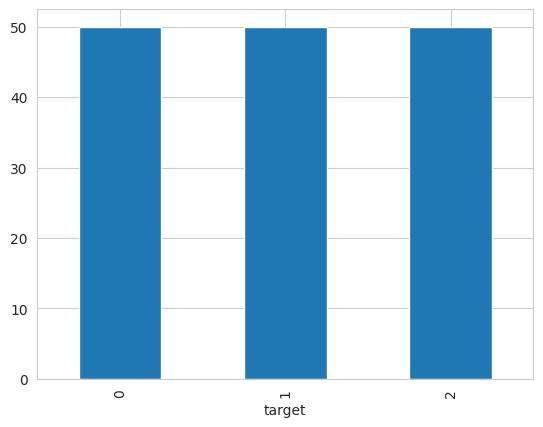

In [8]:
df['target'].value_counts().plot(kind='bar')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:3],df['target'],test_size=0.2)
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('predictions : ',accuracy_score(y_test,y_pred))

predictions :  0.9333333333333333


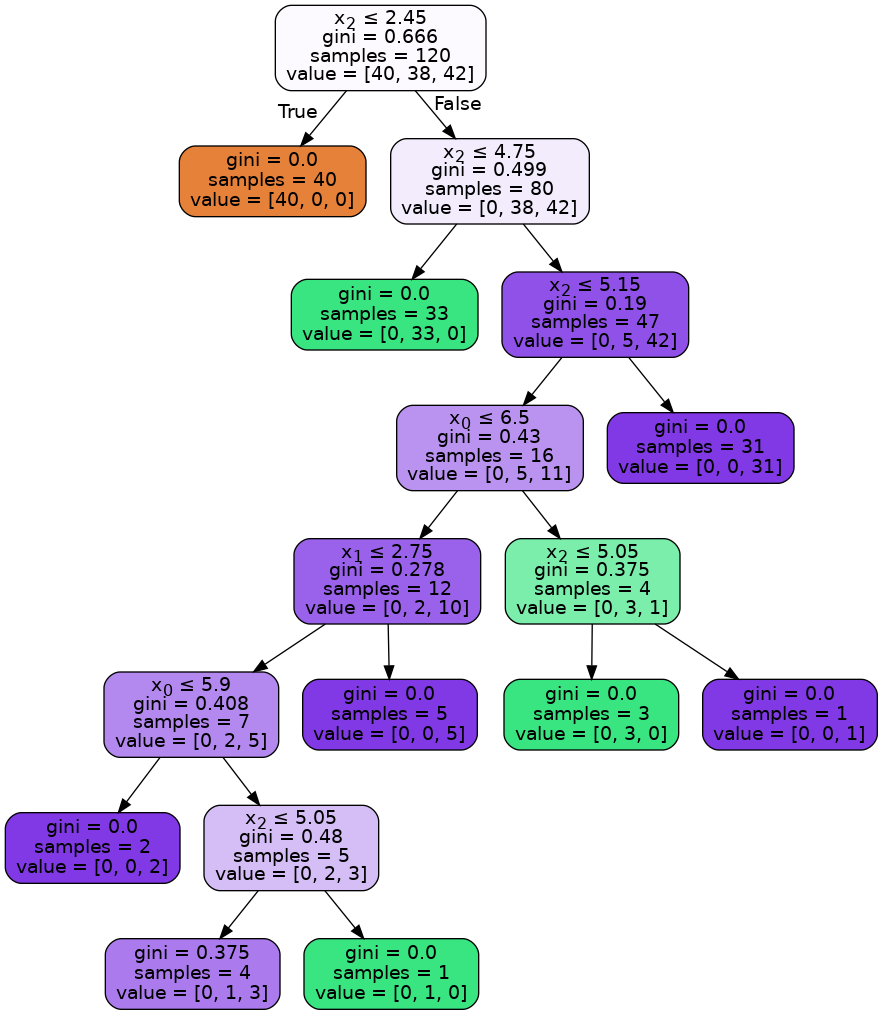

In [10]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

predictions :  0.975


<Axes: >

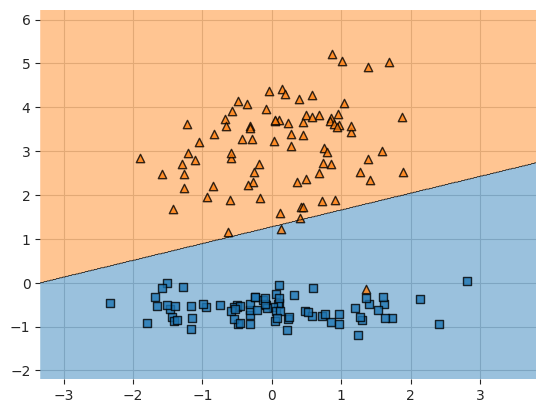

In [40]:
lr = LogisticRegression()
lr.fit(x_test, y_test)
y_predict = lr.predict(x_test)
print('predictions : ',accuracy_score(y_test,y_predict))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train,clf=lr,legend=0)

# Working on digit dataset

In [12]:
df = load_digits()
new_df= pd.DataFrame(df['images'].reshape(1797,64),columns=df['feature_names']) #1797
new_df['target'] = df['target']
new_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


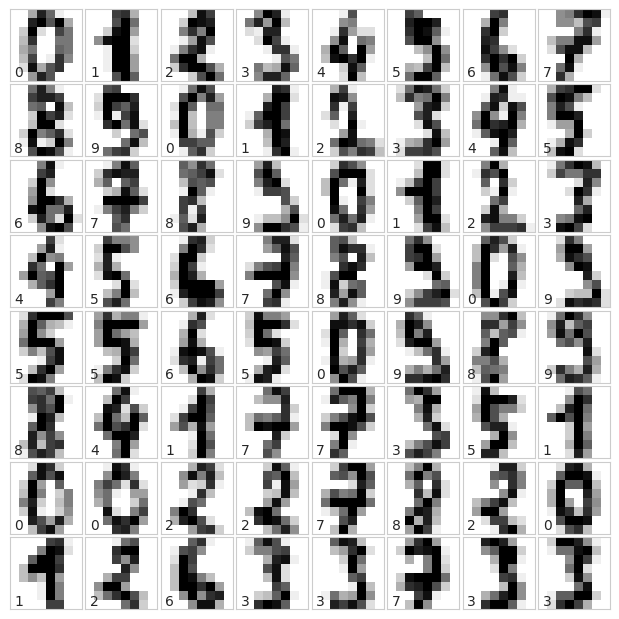

In [13]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
digits = load_digits()
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [14]:
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target)
clf = GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('accuracy : ',accuracy_score(y_test,y_pred))

accuracy :  0.8488888888888889


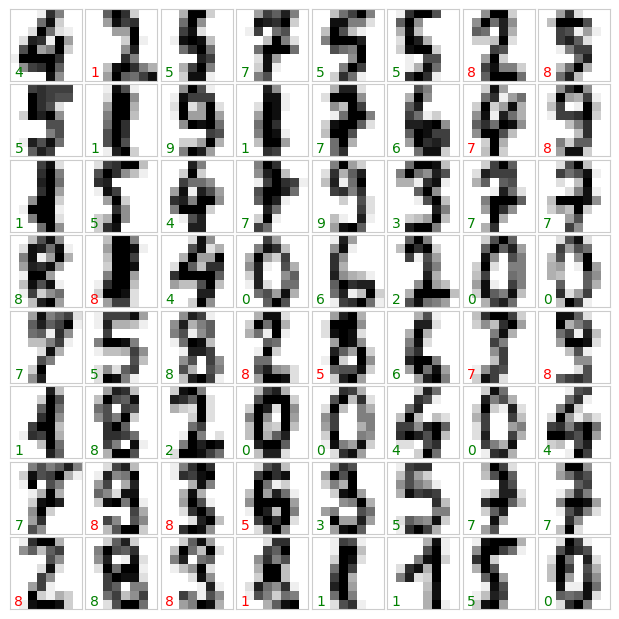

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')


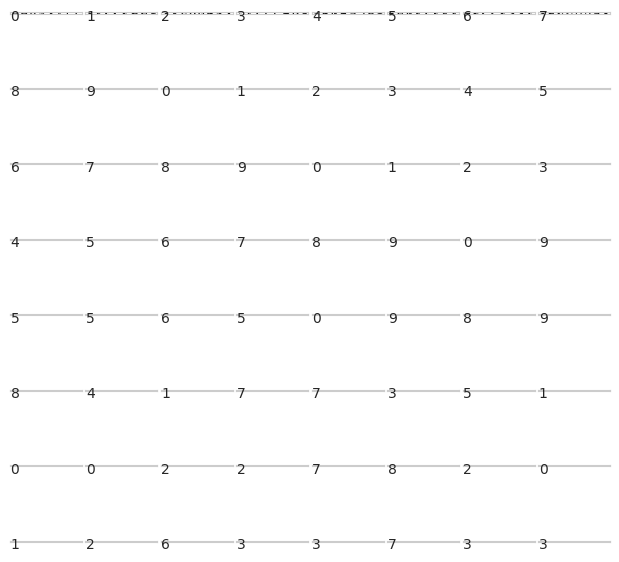

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
xm = x_train
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(xm[i].reshape(1,64), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

# Working with wine datasets

In [25]:
dataset = load_wine()
x,y = load_wine(return_X_y=True)

<Axes: xlabel='target'>

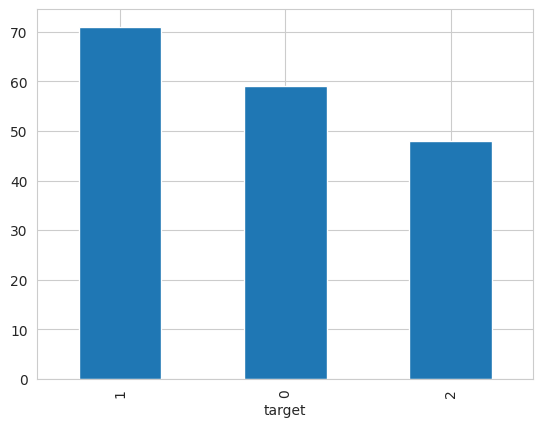

In [26]:
df = pd.DataFrame(x,columns=dataset['feature_names'])
df['target'] = y
df['target'].value_counts().plot(kind='bar') # 0 -> class 1 and 1 -> class 2 and 3 -> class 3

<Axes: xlabel='alcohol', ylabel='malic_acid'>

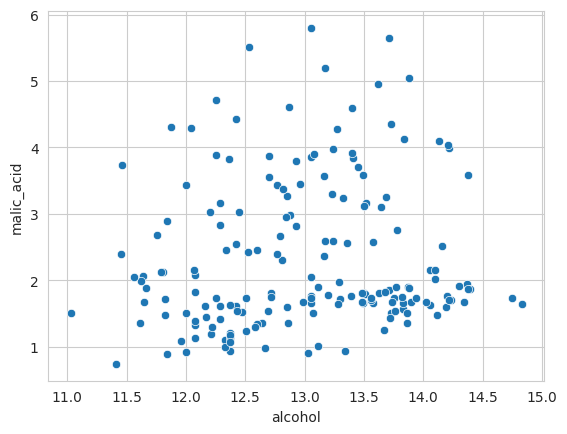

In [27]:
sns.scatterplot(data=df,x=df['alcohol'],y='malic_acid')

<Axes: xlabel='magnesium', ylabel='proline'>

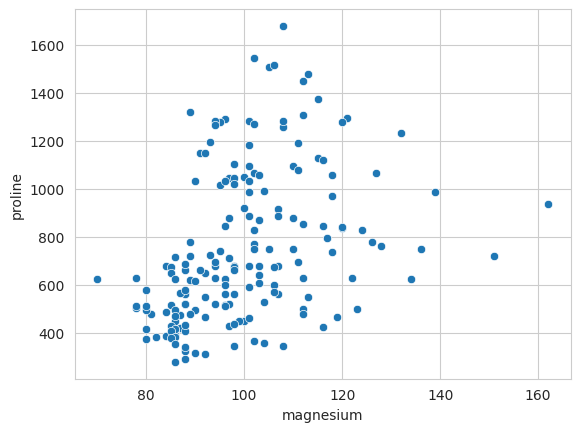

In [28]:
sns.scatterplot(data=df,x=df['magnesium'],y='proline')

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9722222222222222


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9444444444444444


## Working with makeclassifier class and make some clsses

In [31]:
from sklearn.datasets import make_classification

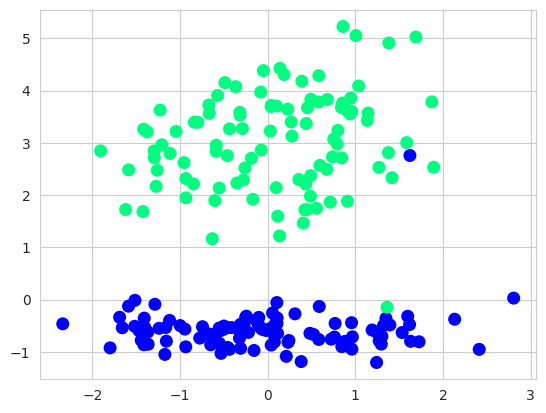

In [32]:
# make a logistic regression class
x,y = make_classification(
    n_samples=200,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,hypercube=False,
    shuffle=True,random_state=12,class_sep=15
)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=70)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("accuracy score is : ",accuracy_score(y_test,y_pred))

accuracy score is :  0.975


<Axes: >

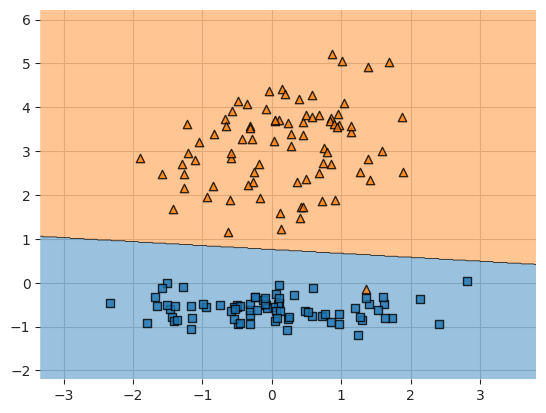

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train,clf=clf,legend=0)

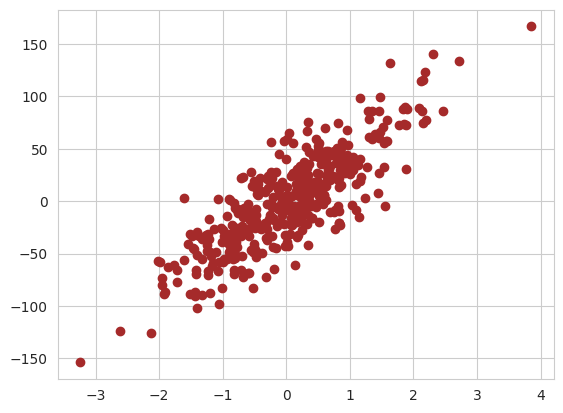

In [84]:
# make a linear regression class
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=400, n_features=1, noise=25, random_state=42)
plt.scatter(x,y,color='brown')

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
ll = LinearRegression()
ll.fit(x_train,y_train)
y_pred = ll.predict(x_test)
print(r2_score(y_test,y_pred))

0.6716720160835838


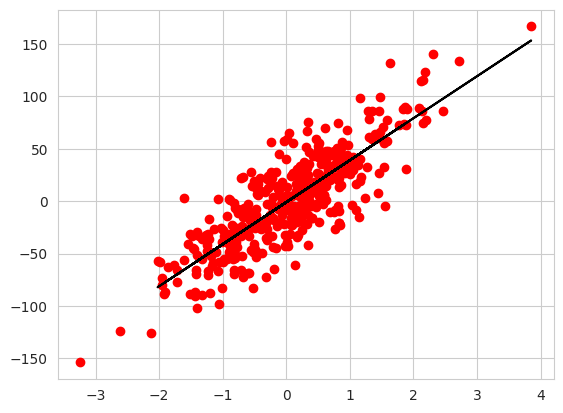

In [91]:
from mlxtend.plotting import plot_linear_regression
plt.scatter(x,y,color='red')
plt.plot(x_test,y_pred,color='black')
plt.show()

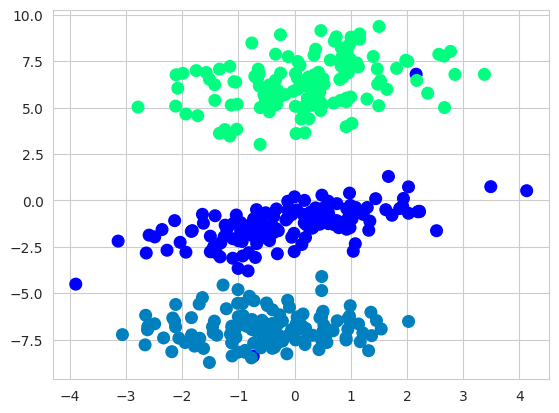

In [93]:
x,y = make_classification(
    n_samples=400,n_features=4,n_informative=4,n_redundant=0,n_classes=3,n_clusters_per_class=1,hypercube=False,
    shuffle=True,random_state=35,class_sep=10
)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=70)

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
dt = LogisticRegression()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('accuracy of model is ',accuracy_score(y_test,y_pred))

accuracy of model is  0.9916666666666667
